In [1]:
import re

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import networkx as nx



In [3]:
str = 'an example word:cat!!'
match = re.search(r'word:\w\w\w', str)
# If-statement after search() tests if it succeeded
if match:
  print('found', match.group()) ## 'found word:cat'
else:
  print('did not find')

found word:cat


In [4]:
#Provide an example of a regex to match 4 digits numbers with re.search

match = re.search(r'\b\d\d\d\d\b', 'here is a number 12534')
if match:
    print('found', match.group()) ## 'found 1234'
else:
    print('did not find')





did not find


In [5]:
# use findall to show that your regex works on regex_exercise.txt file and print the result
with open('regex_exercise.txt', 'r') as f:
    text = f.read()
    print(re.findall(r'\bsuper\w+', text))

    

FileNotFoundError: [Errno 2] No such file or directory: 'regex_exercise.txt'

In [ ]:
# use findall to find the words inside the brackets in regex_exercise.txt file and print the result

with open('regex_exercise.txt', 'r') as f:
    text = f.read()
    print(re.findall(r'\[\w+\]', text))


#use findall to find the words in nested brackets in regex_exercise.txt file and print the result

with open('regex_exercise.txt', 'r') as f:
    text = f.read()
    print(re.findall(r'\[\w+\s\w+\]', text))

    

['[gentrify]', '[hashtag]']
['[drinking vinegar]']


In [6]:
import pickle

In [7]:
# load pickle files dc and marvel

dc = pickle.load(open('dc.pkl', 'rb'))
marvel = pickle.load(open('marvel.pkl', 'rb'))
marvel.head()

CharacterName                 WikiLink
0    Abomination  Abomination (character)
1  Absorbing Man            Absorbing Man
2        Abraxas                      NaN
3          Abyss                      NaN
4         Access                      NaN

In [8]:
# remove lines where 'WikiLink' is NaN

marvel = marvel[marvel['WikiLink'].notnull()]
marvel['WikiLink'] = marvel['WikiLink'].str.replace(' ', '_')

# remove lines were "WikiLink" contains this character "|"

marvel = marvel[~marvel['WikiLink'].str.contains('\|')]


# remove lines where "wikilink" contains caracters that is not a part of the alphabet or a number

marvel = marvel[marvel['WikiLink'].str.contains('^[a-zA-Z0-9_]*$')]
marvel = marvel.reset_index(drop=True)
marvel



CharacterName                  WikiLink
0    Absorbing Man             Absorbing_Man
1        Airstrike           Dmitri_Bukharin
2             Ajak                      Ajak
3             Ajax                      Ajak
4        Liz Allan                 Liz_Allan
..             ...                       ...
757       Zheng Zu                  Zheng_Zu
758      Ziggy Pig  Ziggy_Pig_and_Silly_Seal
759     Arnim Zola                Arnim_Zola
760          Zuras          list_of_Eternals
761          Zzzax                     Zzzax

[762 rows x 2 columns]

In [9]:
# remove lines in dc where 'WikiLink' is NaN and replave ' ' with '_' in 'WikiLink' column and reset index

dc = dc[dc['WikiLink'].notnull()]
dc['WikiLink'] = dc['WikiLink'].str.replace(' ', '_')

# remove lines were "WikiLink" contains this character "|"

dc = dc[~dc['WikiLink'].str.contains('\|')]

# remove lines where "wikilink" contains caracters that is not a part of the alphabet or a number

dc = dc[dc['WikiLink'].str.contains('^[a-zA-Z0-9_]*$')]
dc = dc.reset_index(drop=True)
dc






CharacterName              WikiLink
0         Abin Sur              Abin_Sur
1     Abby Holland          Abby_Holland
2     Adam Strange          Adam_Strange
3    Agent Liberty         Agent_Liberty
4         Air Wave              Air_Wave
..             ...                   ...
249        Vulture         Terrible_Trio
250              X  X_of_the_Underground
251       Xenofobe              Xenofobe
252            Xeo                   Xeo
253          Xombi                 Xombi

[254 rows x 2 columns]

In [10]:
import requests
import json
import urllib.request

In [12]:

# download the wikitext for all the marvel characters and save it as "CharacterName"_marvel.txt file and if Invalid argument is given, print the character name and continue

for i in range(len(marvel)):
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    title = "titles=" + marvel['WikiLink'][i]
    content = "prop=revisions&rvprop=content"
    dataformat ="format=json"

    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    print(query)

    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')

    # save the wikitext in a file

    with open(marvel['WikiLink'][i] + '_marvel.txt', 'w') as f:
        f.write(wikitext)

    



https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Absorbing_Man&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Dmitri_Bukharin&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Ajak&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Ajak&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Liz_Allan&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Ancient_One&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Dirk_Anger&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Annihilus&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Arkon&format=json
https://en.wikipedia.org/w/api.php?act

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [19]:
# download the wikitext for all the dc characters and save it as "CharacterName"_marvel.txt file and if Invalid argument is given, print the character name and continue

for i in range(len(dc)):
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    title = "titles=" + dc['WikiLink'][i]
    content = "prop=revisions&rvprop=content"
    dataformat ="format=json"

    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    print(query)

    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')

    # save the wikitext in a file

    with open(dc['WikiLink'][i] + '_dc.txt', 'w') as f:
        f.write(wikitext)

    

https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Abin_Sur&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Abby_Holland&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Adam_Strange&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Agent_Liberty&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Air_Wave&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Amanda_Waller&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Amazo&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Ambush_Bug&format=json
https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=Anarky&format=json
https://en.wikipedia.org/w/api.

In [11]:
import os

In [12]:
# use os.listdir() to get a list of all the files in the current directory

os.listdir()



['Abby_Holland_dc.txt',
 'Abigail_Brand_marvel.txt',
 'Abin_Sur_dc.txt',
 'Abner_Jenkins_marvel.txt',
 'Abraham_Cornelius_marvel.txt',
 'Absorbing_Man_marvel.txt',
 'Adam_Strange_dc.txt',
 'Adrienne_Frost_marvel.txt',
 'Agatha_Harkness_marvel.txt',
 'Agent_Liberty_dc.txt',
 'Air_Wave_dc.txt',
 'Ajak_marvel.txt',
 'Albert_Rothstein_dc.txt',
 'Aldrich_Killian_marvel.txt',
 'Aleksander_Lukin_marvel.txt',
 'Aleta_Ogord_marvel.txt',
 'Alexander_Bont_marvel.txt',
 'Alexander_Goodwin_Pierce_marvel.txt',
 'Alicia_Masters_marvel.txt',
 'Alyssa_Moy_marvel.txt',
 'Al_MacKenzie_marvel.txt',
 'Amadeus_Cho_marvel.txt',
 'Amanda_Sefton_marvel.txt',
 'Amanda_Waller_dc.txt',
 'Amazo_dc.txt',
 'Ambush_Bug_dc.txt',
 'Anarky_dc.txt',
 'Ancient_One_marvel.txt',
 'Andrew_Chord_marvel.txt',
 'Andy_Lorimer_marvel.txt',
 'Angel_and_the_Ape_dc.txt',
 'Animal_Man_dc.txt',
 'Anna_Fortune_dc.txt',
 'Anna_Maria_Marconi_marvel.txt',
 'Anne_Marie_Hoag_marvel.txt',
 'Annihilus_marvel.txt',
 'Anton_Arcane_dc.txt',
 'An

In [33]:
with open('Iron_Man_2020_marvel.txt', 'r') as f:
    text = f.read()
    #print(re.findall(r'\[\[([^]]+)', text)) # print the hyperlinks in the file

    #If the print contains "|" print the last part of the link and if it does not contain "|" print the whole link



#save the hyperlinks in a list called "links" and print the list 

links = []
for i in re.findall(r'\[\[([^]]+)', text):
    if "|" in i:
        links.append(i.split("|")[-1])
    else:
        links.append(i)


print(links)
        

        


['Special:ApiFeatureUsage', 'Marvels', 'Alex Ross', 'Marvel Comics', 'Machine Man', 'Tom DeFalco', 'Herb Trimpe', 'Arno Stark', 'fictional character', 'American comic book', 'Marvel Comics', 'superhero', 'superhero', 'Iron Man', 'multiverse', 'Machine Man', 'limited series', 'Tom DeFalco', 'Herb Trimpe', 'first cousin once removed', 'Morgan Stark', 'Stark Industries', 'mercenary', 'espionage', 'Sunset Bain', 'Machine Man', 'retinal scan', 'Iron Man', 'Blizzard', 'Spider-Man', "the scars Arno inflicted would eventually lead Saunders's vengeance-minded future self to sabotage Arno's factory, thus Arno unwittingly creates the situation he traveled back in time to resolve", "Death's Head", 'Time Variance Authority', 'S.H.I.E.L.D.', 'sky pirate', 'Extremis', 'Sinister Six', 'Doctor Octopus', 'plans', 'Kang the Conqueror', 'Apocalypse Twins', 'armor', 'cybernetic', 'warfare', 'Avengers Forever', 'Marvel Zombies 5', 'wild west', 'Hurricane', 'zombie', 'Paradise X', 'Bloodstorm', 'Deathlok', '

In [49]:
#print links that has the same words as in the marvel or dc dataframe and add an attribute to the links that has the same words as in the marvel or dc dataframe

links_Marvel = []
links_DC = []

for i in links: 
    if any(i in s for s in marvel['CharacterName'].values):
        links_Marvel.append(i)
    else:
        pass

for i in links:
    if any(i in s for s in dc['CharacterName'].values):
        links_DC.append(i)
    else:
        pass



['Iron Man', 'Iron Man', 'Blizzard', 'Iron Man']

In [11]:
#loop over the txt files in os.listdir() and print the hyperlinks that has the same words as in the marvel or dc dataframe and add an attribute to the links that has the same words as in the marvel or dc dataframe
#Use a NetworkX DiGraph to store the network and whether they are from Marvel or DC.


links_Marvel = []
links_DC = []

for i in os.listdir():
    if i.endswith('.txt'):
        with open(i, 'r') as f:
            text = f.read()
            links = []
            for i in re.findall(r'\[\[([^]]+)', text):
                if "|" in i:
                    links.append(i.split("|")[-1])
                else:
                    links.append(i)
            for i in links: 
                if any(i in s for s in marvel['CharacterName'].values):
                    links_Marvel.append(i)
                else:
                    pass
            for i in links:
                if any(i in s for s in dc['CharacterName'].values):
                    links_DC.append(i)
                else:
                    pass




In [13]:
links_Marvel

['Universe',
 'Hell',
 'Beast',
 'Beast',
 'Maria Hill',
 'Skrull',
 'Mister Fantastic',
 'Beta Ray Bill',
 'Henry Peter Gyrich',
 'Jazinda',
 'Rocket Raccoon',
 'Hulkling',
 'Maria Hill',
 'Peter Corbeau',
 'Living Laser',
 'Madame Masque',
 'Kang the Conqueror',
 'Skrull',
 'demon',
 'Hell',
 'Scar',
 'demon',
 'Justin Hammer',
 'Helmut Zemo',
 'Justin Hammer',
 'Iron Man',
 'Henry Peter Gyrich',
 'Citizen V',
 'Moonstone',
 'Baron Wolfgang von Strucker',
 'Luke Cage',
 'Thor',
 'Nova',
 'Old Man Logan',
 'Iron Man',
 'Iron Man',
 'Lord Dark Wind',
 'Lady Deathstrike',
 'Omega Red',
 'Maverick',
 'Lady Deathstrike',
 'Storm',
 'Deadpool',
 'Stryker',
 'Thor',
 'Black Bolt',
 'Thor',
 'Thor',
 'Hulk',
 'She-Hulk',
 'Ethan Edwards',
 'Jazinda',
 'Maria Hill',
 'Sharon Carter',
 'Red Skull',
 'Doctor Doom',
 'Helmut Zemo',
 'Black Bolt',
 'Ultron',
 'Machine Man',
 'Old Man Logan',
 'Thor',
 'Mysterio',
 'Thor',
 'Helmut Zemo',
 'Glenn Talbot',
 'Matt',
 'eyes',
 'Detroit',
 'Emma Frost

In [13]:
#Use a NetworkX DiGraph to store the network. As noted above, remember to store the properties of the nodes (i.e. from which universe they hail).

import networkx as nx
import matplotlib.pyplot as plt


In [34]:
G = nx.DiGraph()

for i in os.listdir():
    if i.endswith('.txt'):
        with open(i, 'r') as f:
            text = f.read()
            links = []
            for i in re.findall(r'\[\[([^]]+)', text):
                if "|" in i:
                    links.append(i.split("|")[-1])
                else:
                    links.append(i)
            for i in links:
                if any(i in s for s in marvel['CharacterName'].values):
                    G.add_node(i, universe = 'Marvel')
                else:
                    pass
            for i in links:
                if any(i in s for s in dc['CharacterName'].values):
                    G.add_node(i, universe = 'DC')
                else:
                    pass

                #add edges between the nodes if 
            for i in links:
                if any(i in s for s in marvel['CharacterName'].values):
                    for j in links:
                        if any(j in s for s in dc['CharacterName'].values):
                            G.add_edge(i, j, color = 'green')
                        else:
                            pass
                else:
                    pass
            for i in links:
                if any(i in s for s in dc['CharacterName'].values):
                    for j in links:
                        if any(j in s for s in marvel['CharacterName'].values):
                            G.add_edge(i, j, color = 'green')
                        else:
                            pass
                else:
                    pass
            



AttributeError: 'DiGraph' object has no attribute 'add_edge_from'

In [46]:
#go through os.listdir() and add a node if the file name is in the marvel or dc dataframe and add an attribute to the node if it is from marvel or dc

for i in os.listdir():
    if i.endswith('.txt'):
        if any(i.split('_')[0] in s for s in marvel['CharacterName'].values):
            G.add_node(i.split('_')[0], universe = 'Marvel')
        else:
            pass
        if any(i.split('_')[0] in s for s in dc['CharacterName'].values):
            G.add_node(i.split('_')[0], universe = 'DC')
        else:
            pass

#go through os.listdir() and add an edge if the link is in the marvel or dc dataframe and add an attribute to the edge if it is from marvel or dc

for i in os.listdir():
    if i.endswith('marvel.txt'):
        with open(i, 'r') as f:
            text = f.read()
            links = []
            for i in re.findall(r'\[\[([^]]+)', text):
                if "|" in i:
                    links.append(i.split("|")[-1])
                else:
                    links.append(i)
                # add an edge between marvel characters if the link is in the marvel dataframe. 
            for i in links:
                if any(i in s for s in marvel['CharacterName'].values):
                    G.add_edge(i,j, color = 'green')
                else:
                    pass
                # add an edge between marvel and dc if the link is in the dc dataframe.
            for i in links:
                if any(i in s for s in dc['CharacterName'].values):
                    G.add_edge(i,j, color = 'green')
                else:
                    pass

    else:
        pass



                

        

In [47]:
#print the number of nodes and links in the graph

print(nx.info(G))



# calculate the in_degree of the graph and print the top 10 nodes with the highest in_degree

in_degree = G.in_degree()
sorted_in_degree = sorted(in_degree, key=lambda x: x[1], reverse=True)
print(sorted_in_degree[:10])

# calculate the out_degree of the graph and print the top 10 nodes with the highest out_degree

out_degree = G.out_degree()
sorted_out_degree = sorted(out_degree, key=lambda x: x[1], reverse=True)
print(sorted_out_degree[:10])











DiGraph with 1436 nodes and 18826 edges
[('Category:Marvel Comics supervillains', 802), ('Iron Man', 504), ('Beast', 302), (' ', 287), ('Wizard', 235), ('Death', 198), ('Superman', 197), ('Batman', 193), ('Manhattan', 190), ('Lex Luthor', 172)]
[('Iron Man', 505), ('Beast', 303), (' ', 288), ('Wizard', 236), ('Death', 199), ('Superman', 198), ('Batman', 194), ('Manhattan', 191), ('Lex Luthor', 173), ('Arrow', 172)]


C:\Users\scitu\AppData\Local\Temp\ipykernel_10868\2012470556.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


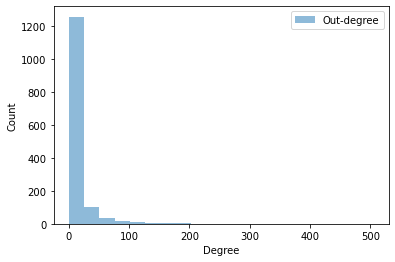

In [48]:
#Plot the in and out-degree distributions for the entire network and for each universe separately.

network_in_degrees = [G.in_degree(n) for n in G.nodes()]
network_out_degrees = [G.out_degree(n) for n in G.nodes()]

plt.hist(network_out_degrees, bins=20, alpha=0.5, label='Out-degree')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

plt.hist(network_in_degrees, bins=20, alpha=0.5, label='In-degree')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()






In [49]:
import random

In [53]:
#Compare the out-degree distribution to a random network with the same number of nodes and edges


random_graph = nx.gnm_random_graph(len(G.nodes()), len(G.edges()))


#plot the random graph out-degree distribution and the network out-degree distribution

print(nx.info(random_graph))





Graph with 1436 nodes and 18826 edges


C:\Users\scitu\AppData\Local\Temp\ipykernel_10868\1498147432.py:9: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(random_graph))


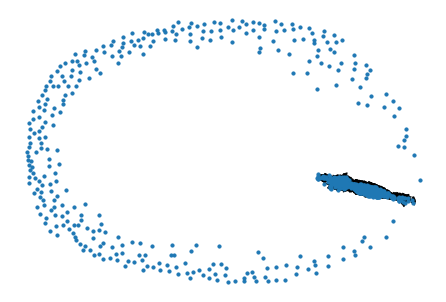

In [57]:
#Show the graph of the network

nx.draw(G, with_labels=False, node_size=10)
plt.show()